# **Clustering Using Income & Spent**

## **Importing Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Load Dataset into Notebook**

In [18]:
from google.colab import files
uploaded = files.upload()

Saving salarySpendDataset.csv to salarySpendDataset (1).csv


## **Load Dataset**

In [19]:
dataset = pd.read_csv('salarySpendDataset.csv')
dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


## **Dataset Summarization**

In [20]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(303, 2)
           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


## **Seggregate & Zipping Dataset**

In [21]:
income = dataset['INCOME'].values
spend = dataset['SPEND'].values
x = np.array(list(zip(income,spend)))
x

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

## **Finding of Optimized K-Value**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

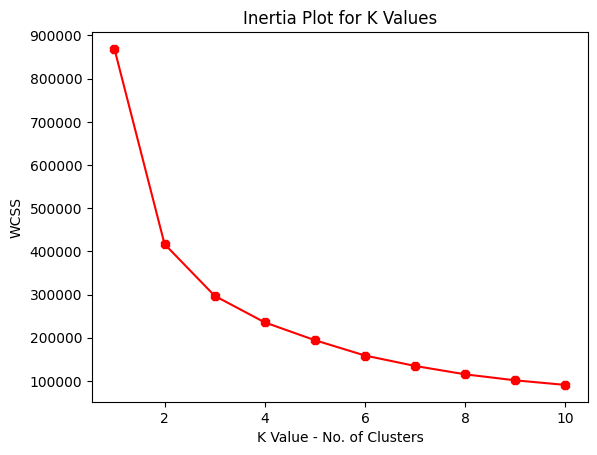

In [22]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters = i, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, color = 'red', marker = "8")
plt.title('Inertia Plot for K Values')
plt.xlabel('K Value - No. of Clusters')
plt.ylabel('WCSS')
plt.show()

## **Model Training and Clustering with k=4**

In [23]:
model = KMeans(n_clusters = 4, random_state = 0)
y_means = model.fit_predict(x)
print(y_means)

[3 3 2 3 1 2 1 3 2 2 3 0 3 2 3 2 1 0 3 3 3 3 3 0 2 1 2 2 1 2 2 2 3 3 2 2 1
 3 3 1 1 3 2 0 1 1 3 3 2 3 3 1 3 2 3 2 3 3 2 1 0 1 2 2 2 2 2 3 3 2 3 3 2 3
 2 3 3 3 2 3 3 1 1 1 0 3 3 2 2 0 3 2 3 1 2 0 1 3 1 3 3 0 2 3 2 2 0 3 3 3 1
 2 1 2 3 2 2 2 2 3 1 3 3 3 2 2 2 3 2 0 2 3 1 3 1 3 2 2 2 0 1 1 2 2 2 3 3 3
 3 2 3 2 3 3 2 2 3 2 2 3 3 1 2 2 2 0 0 3 3 2 3 3 1 3 2 2 3 1 2 0 1 0 1 3 0
 1 3 0 3 2 1 2 2 0 2 1 3 3 0 3 2 0 0 3 2 3 3 3 2 2 3 0 2 1 3 1 0 1 0 3 1 0
 3 0 0 2 0 2 1 1 3 0 1 0 1 1 1 1 1 3 0 3 2 0 2 3 1 0 3 3 1 3 0 1 0 1 0 2 3
 3 3 3 0 3 2 2 1 2 0 0 3 3 0 3 0 2 0 0 1 2 1 2 2 3 2 1 2 3 1 2 2 1 3 2 2 2
 2 2 0 0 2 2 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **Visualizing the Cluster for k = 4**

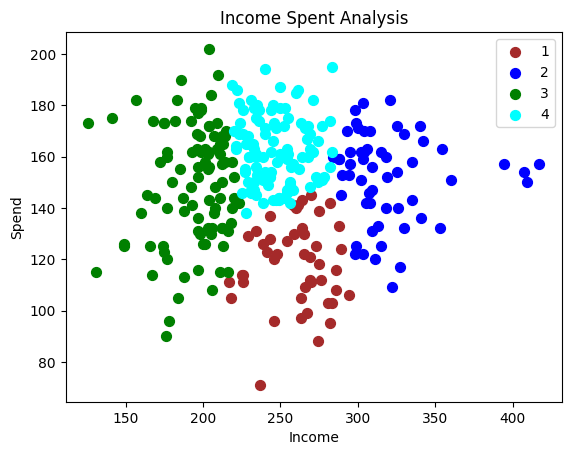

In [24]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s = 50, c = 'brown', label = '1')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s = 50, c = 'blue', label = '2')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s = 50, c = 'green', label = '3')
plt.scatter(x[y_means==3,0], x[y_means==3,1], s = 50, c = 'cyan', label = '4')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.show()